In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import time

In [15]:
# Load CIFAR-10 Dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Normalize data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Data Augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)


In [16]:

# Build the Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Unfreeze more layers for better fine-tuning
for layer in base_model.layers[:15]:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

# Compile the Model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for better training
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint(filepath='vgg16_cifar10_best.keras', monitor='val_accuracy', save_best_only=True, verbose=1)



In [19]:
# Train the Model
batch_size = 64
epochs = 50

history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(X_train) // batch_size,
                    validation_data=(X_test, y_test),
                    epochs=epochs,
                    callbacks=[reduce_lr, early_stopping, model_checkpoint])

# Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

# Save the Model
model.save('vgg16_cifar10_custom_augmented_final.keras', save_format='tf')



Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.2891 - loss: 2.5756
Epoch 1: val_accuracy improved from -inf to 0.52970, saving model to vgg16_cifar10_best.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 255s 325ms/step - accuracy: 0.2892 - loss: 2.5751 - val_accuracy: 0.5297 - val_loss: 1.5705 - learning_rate: 5.0000e-05
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 3:42 286ms/step - accuracy: 0.5469 - loss: 1.4262

2024-11-28 18:49:28.518016: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_accuracy did not improve from 0.52970
781/781 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5469 - loss: 1.4262 - val_accuracy: 0.5243 - val_loss: 1.5958 - learning_rate: 5.0000e-05
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.4629 - loss: 1.7566
Epoch 3: val_accuracy improved from 0.52970 to 0.59640, saving model to vgg16_cifar10_best.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 264s 337ms/step - accuracy: 0.4629 - loss: 1.7565 - val_accuracy: 0.5964 - val_loss: 1.3045 - learning_rate: 5.0000e-05
Epoch 4/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5:23 415ms/step - accuracy: 0.3750 - loss: 1.9567

2024-11-28 18:54:22.401592: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 4: val_accuracy did not improve from 0.59640
781/781 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.3750 - loss: 1.9567 - val_accuracy: 0.5957 - val_loss: 1.3094 - learning_rate: 5.0000e-05
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.5123 - loss: 1.5473
Epoch 5: val_accuracy improved from 0.59640 to 0.65200, saving model to vgg16_cifar10_best.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 262s 335ms/step - accuracy: 0.5123 - loss: 1.5473 - val_accuracy: 0.6520 - val_loss: 1.0805 - learning_rate: 5.0000e-05
Epoch 6/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 3:36 277ms/step - accuracy: 0.5469 - loss: 2.0198
Epoch 6: val_accuracy did not improve from 0.65200
781/781 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.5469 - loss: 2.0198 - val_accuracy: 0.6519 - val_loss: 1.0830 - learning_rate: 5.0000e-05
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.5418 - loss: 1.4100
Epoch 7: val_accuracy did not improve from 0.65200
781/781 ━━━━━━━━━━━━━━━━━━━━ 255s 326ms/

2024-11-28 19:03:57.868698: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 8: val_accuracy did not improve from 0.65200
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.4219 - loss: 1.7490 - val_accuracy: 0.6491 - val_loss: 1.0350 - learning_rate: 5.0000e-05
Epoch 9/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 799ms/step - accuracy: 0.5653 - loss: 1.3021
Epoch 9: val_accuracy improved from 0.65200 to 0.65910, saving model to vgg16_cifar10_best.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 1169s 1s/step - accuracy: 0.5653 - loss: 1.3021 - val_accuracy: 0.6591 - val_loss: 1.0303 - learning_rate: 5.0000e-05
Epoch 10/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 3:19 256ms/step - accuracy: 0.5469 - loss: 1.1086
Epoch 10: val_accuracy did not improve from 0.65910
781/781 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.5469 - loss: 1.1086 - val_accuracy: 0.6558 - val_loss: 1.0358 - learning_rate: 5.0000e-05
Epoch 11/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 746ms/step - accuracy: 0.5804 - loss: 1.2545
Epoch 11: val_accuracy improved from 0.65910 to 0.67080, saving model to vgg16_cifar10_bes

2024-11-28 19:59:18.331149: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 16: val_accuracy did not improve from 0.69700
781/781 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5781 - loss: 1.2065 - val_accuracy: 0.6965 - val_loss: 0.8860 - learning_rate: 5.0000e-05
Epoch 17/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.6195 - loss: 1.1166
Epoch 17: val_accuracy improved from 0.69700 to 0.71330, saving model to vgg16_cifar10_best.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 336s 431ms/step - accuracy: 0.6195 - loss: 1.1166 - val_accuracy: 0.7133 - val_loss: 0.8330 - learning_rate: 5.0000e-05
Epoch 18/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 3:40 283ms/step - accuracy: 0.6250 - loss: 1.2122
Epoch 18: val_accuracy did not improve from 0.71330
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.6250 - loss: 1.2122 - val_accuracy: 0.7109 - val_loss: 0.8395 - learning_rate: 5.0000e-05
Epoch 19/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.6383 - loss: 1.0669
Epoch 19: val_accuracy did not improve from 0.71330
781/781 ━━━━━━━━━━━━━━━━━━━━ 251s

2024-11-28 20:40:02.843723: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 32: val_accuracy did not improve from 0.73410
781/781 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6875 - loss: 1.1024 - val_accuracy: 0.7186 - val_loss: 0.8127 - learning_rate: 2.5000e-05
Epoch 33/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.6839 - loss: 0.9193
Epoch 33: val_accuracy improved from 0.73410 to 0.73730, saving model to vgg16_cifar10_best.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 291s 373ms/step - accuracy: 0.6839 - loss: 0.9193 - val_accuracy: 0.7373 - val_loss: 0.7618 - learning_rate: 2.5000e-05
Epoch 34/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:20 335ms/step - accuracy: 0.6562 - loss: 0.9163
Epoch 34: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.

Epoch 34: val_accuracy did not improve from 0.73730
781/781 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.6562 - loss: 0.9163 - val_accuracy: 0.7373 - val_loss: 0.7595 - learning_rate: 2.5000e-05
Epoch 35/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.6941 - loss: 0.8887
Epoch 3

Test Accuracy: 0.7573


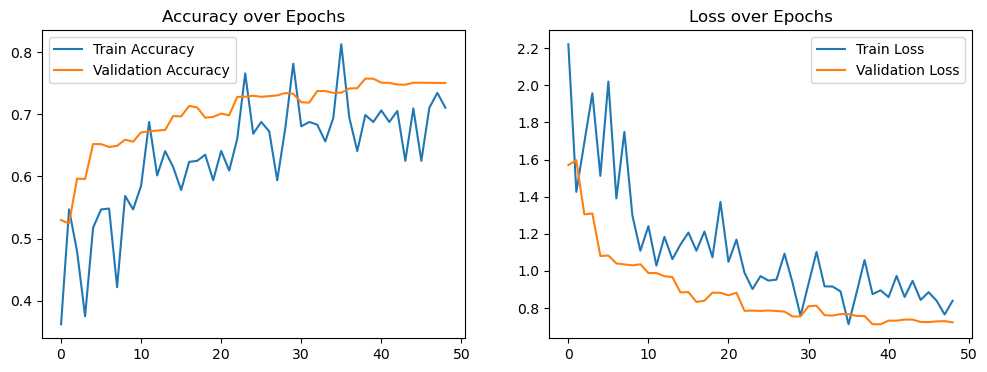

In [26]:
# Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


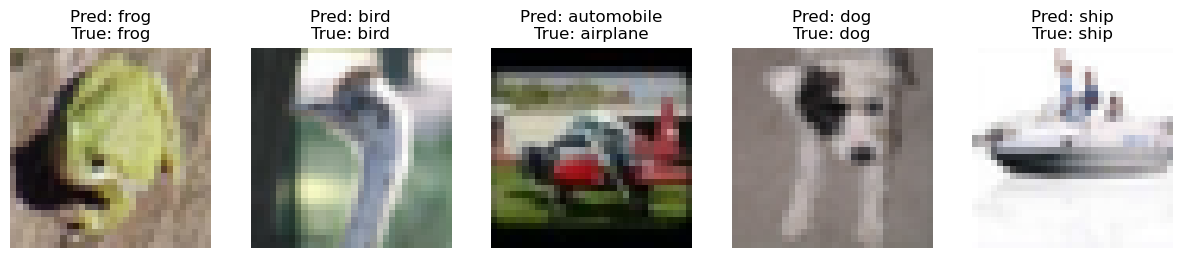

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


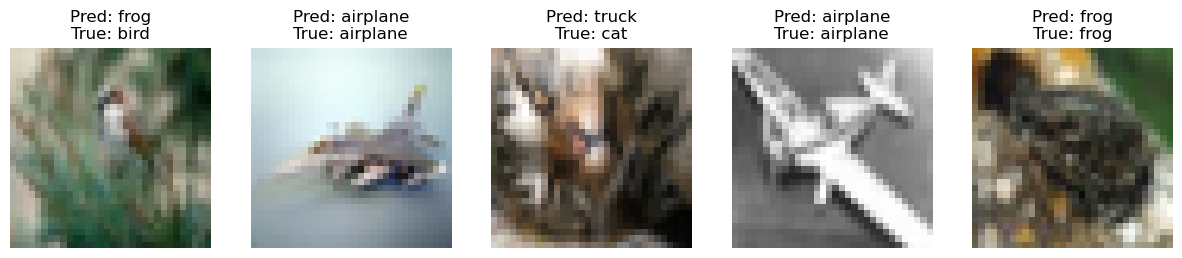

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


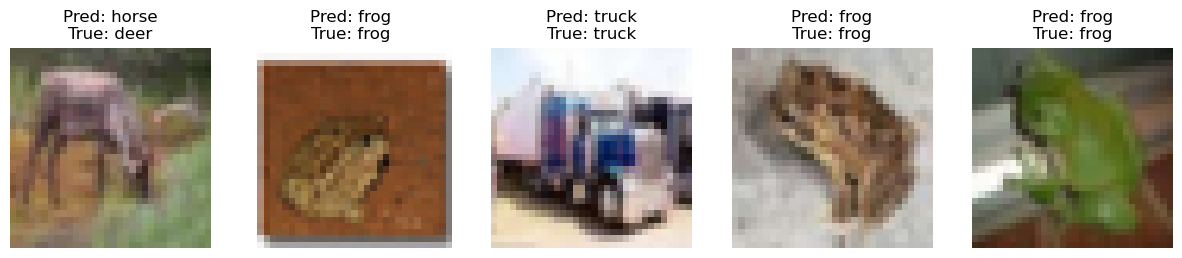

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


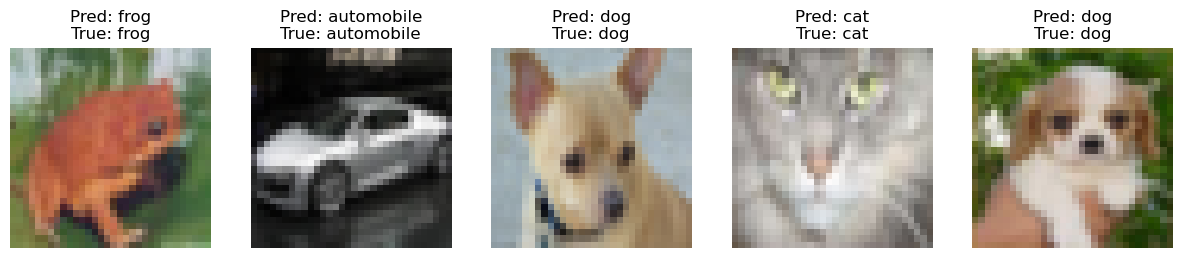

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


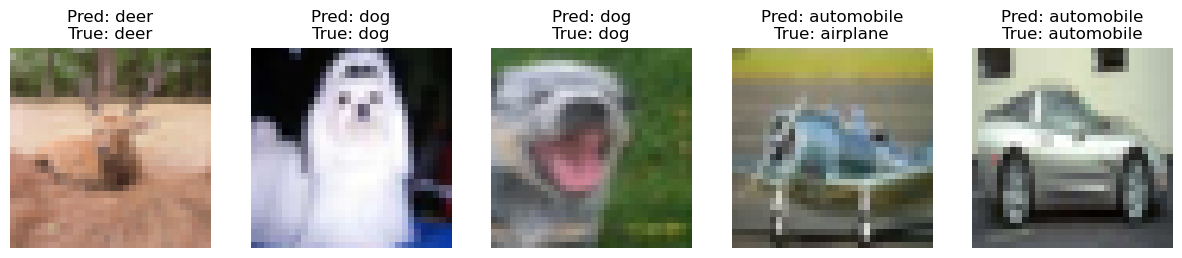

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


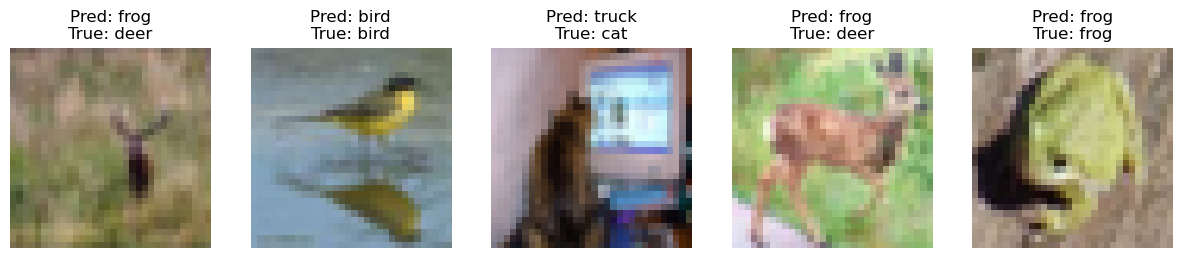

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


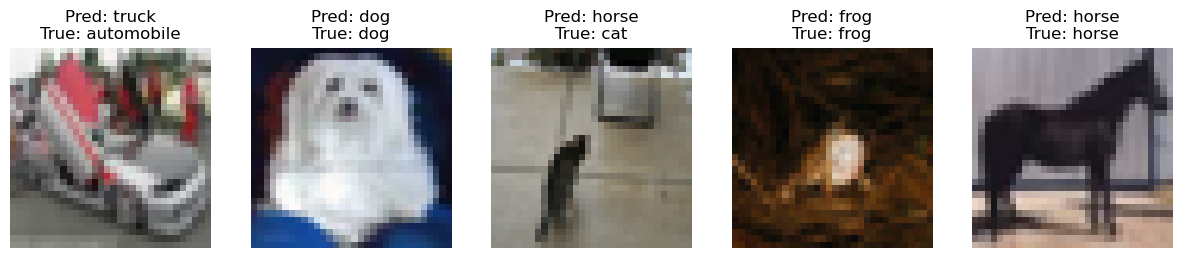

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


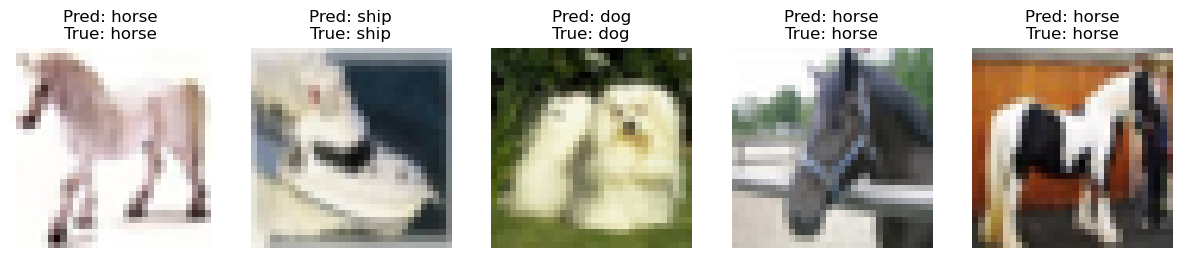

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


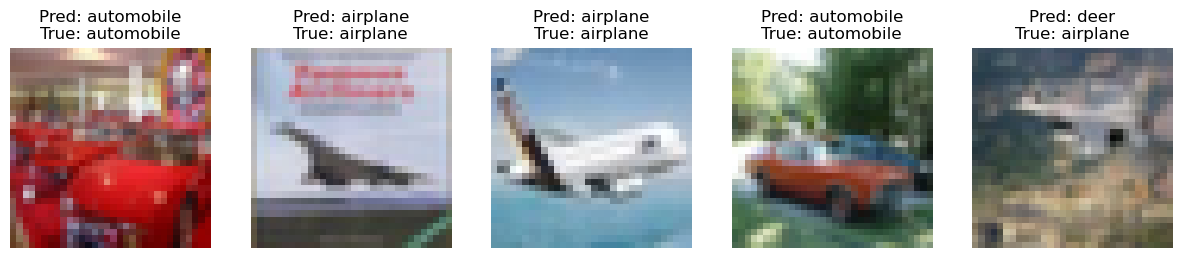

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


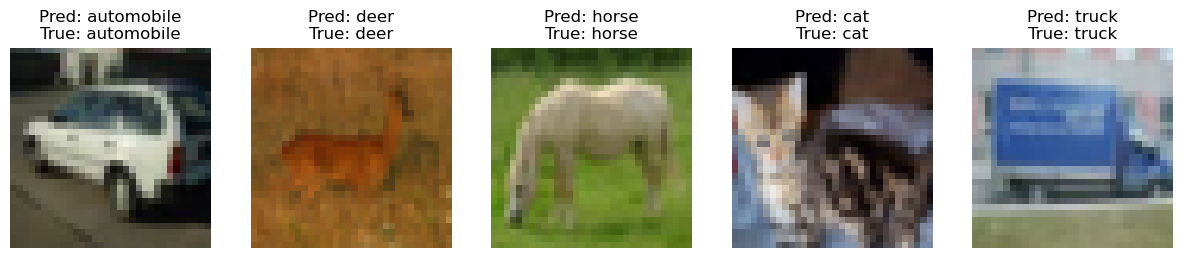

In [32]:
# testing the model using random samples
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

# Get some random test images
for x in range(0, 10):
    num_images = 5
    random_indices = np.random.choice(len(X_test), num_images, replace=False)
    test_images = X_test[random_indices]
    test_labels = y_test[random_indices]
    
    # Make predictions
    predictions = model.predict(test_images)
    
    # Plot the images with their predicted labels
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(test_images[i])  # Removed interpolation to reduce blur
        plt.axis('off')
        predicted_label = class_names[np.argmax(predictions[i])]
        true_label = class_names[np.argmax(test_labels[i])]
        plt.title(f"Pred: {predicted_label}\nTrue: {true_label}")
    plt.show()